modules for model development

1  -  load libraries

2  -  data profilling  (understand the data)

3  -  EDA

4  -  Data Cleaning

5  -  EDA after data cleaning

6

7

8

**load libraries**

we need basic libraries like pandas,numpy for data handling,seaborn is used for statistical graphics in Python.

sklearn is machine learning library which contain all ml algorithms and useful methods for preprocessing.this library contain lots of features like Cross-validation,train-split etc.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing 
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Data Profilling**

In [ ]:
data = pd.read_excel('/content/Data_Cortex_Nuclear.xls')

In [ ]:
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [ ]:
data.shape

(1080, 82)

In [ ]:
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1062.000000,1077.000000,1077.000000,1077.000000,1073.000000,1077.000000,1077.000000,1077.000000,1062.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,0.545904,0.313505,0.317939,0.275033,0.825813,0.726933,1.561965,1.525338,0.442848,0.682236,0.378519,0.363357,0.180492,1.173400,2.474492,1.172603,0.241644,0.272789,0.693180,0.168417,0.404808,2.146550,0.542635,0.452459,0.415311,0.759047,0.585186,0.368370,0.565317,0.357095,0.315813,0.418605,0.394475,0.181080,0.943116,0.161211,1.706599,0.292434,0.429226,1.197420,0.216482,0.166631,0.179307,0.121521,0.156478,0.181300,0.210489,0.120889,0.221851,0.126560,0.527349,0.291276,1.548348,2.235236,0.159821,1.239270,0.848767,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,0.345309,0.051978,0.052236,0.046164,0.117969,0.188013,0.270737,0.481780,0.066672,0.127434,0.216388,0.052352,0.026370,0.335786,0.653397,0.244752,0.033901,0.041075,0.120825,0.028138,0.061173,0.435742,0.280568,0.065488,0.089290,0.122446,0.100601,0.062583,0.088201,0.063025,0.054163,0.067288,0.156170,0.029296,0.172838,0.019308,0.578442,0.037380,0.137440,0.361743,0.185309,0.031896,0.018826,0.014276,0.015071,0.024919,0.069010,0.013233,0.034886,0.026885,0.082057,0.030015,0.248132,0.254395,0.024150,0.173580,0.094311,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,0.149155,0.052110,0.191431,0.056818,0.500160,0.281285,0.301609,0.567840,0.095942,0.064421,0.143894,0.212960,0.113636,0.497695,1.131796,0.151124,0.046298,0.147201,0.198743,0.107394,0.235595,1.134886,0.217120,0.201143,0.227880,0.166579,0.155321,0.226409,0.184785,0.185598,0.194824,0.237777,0.131120,0.117999,0.344120,0.099976,0.598767,0.181157,0.130206,0.529108,0.052528,-0.062008,0.072326,0.067254,0.100217,0.099734,0.096233,0.086114,0.111382,0.072580,0.284001,0.207438,0.853176,1.206098,0.101233,0.750664,0.577397,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,0.337405,0.281242,0.281829,0.244287,0.743491,0.590303,1.381288,1.168258,0.404144,0.596816,0.264334,0.330859,0.161830,0.944435,1.991756,1.023134,0.220400,0.247096,0.617074,0.149622,0.366339,1.826707,0.319639,0.410389,0.351992,0.683501,0.530881,0.326621,0.514892,0.312766,0.276127,0.371976,0.281090,0.

In [ ]:
data.columns  

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

check null data

In [ ]:
data.isnull()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1076,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [ ]:
data.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [ ]:
# Null list contains column names having null values
null_list=[]
for i in range (0,data.isnull().sum().shape[0]-1):
  if(data.isnull().sum()[i]>0):
    null_list.append(data.isnull().sum().index[i])


In [ ]:
len(null_list)    # 49 columns having null values

49

In [ ]:
for i in null_list: 
    if(i == 'H3MeK4_N') : 
        print ("Element Exists") 

Element Exists


In [ ]:
# catagorical list contains column names having categorial values
cat_features=[i for i in data.columns if data.dtypes[i]=='object'] 

In [ ]:
len(cat_features)    # 5 columns having categorial data

5

In [ ]:
data.nunique(axis=0)

MouseID      1080
DYRK1A_N     1077
ITSN1_N      1076
BDNF_N       1077
NR1_N        1077
             ... 
CaNA_N       1080
Genotype        2
Treatment       2
Behavior        2
class           8
Length: 82, dtype: int64

In [ ]:
data['class'].value_counts()   # from this we can say labels are balanced

c-SC-m    150
c-CS-m    150
t-SC-s    135
t-SC-m    135
c-SC-s    135
t-CS-m    135
c-CS-s    135
t-CS-s    105
Name: class, dtype: int64

In [ ]:
data.shape

(1080, 82)

-------------------------------------------------------------------------------



we perform data profilling for understanding the dataset 

size of dataset is 1080 rows × 82 columns

all columns are float datatype except MouseID,Genotype,Treatment,Behavior,class columns .

data.columns  is used to get list of all columns

data.nunique(axis=0) this function used to show unique value per column

49 columns having null values

5 columns having categorial data





--------------------------------------------------------------------------------

**Graph based EDA**

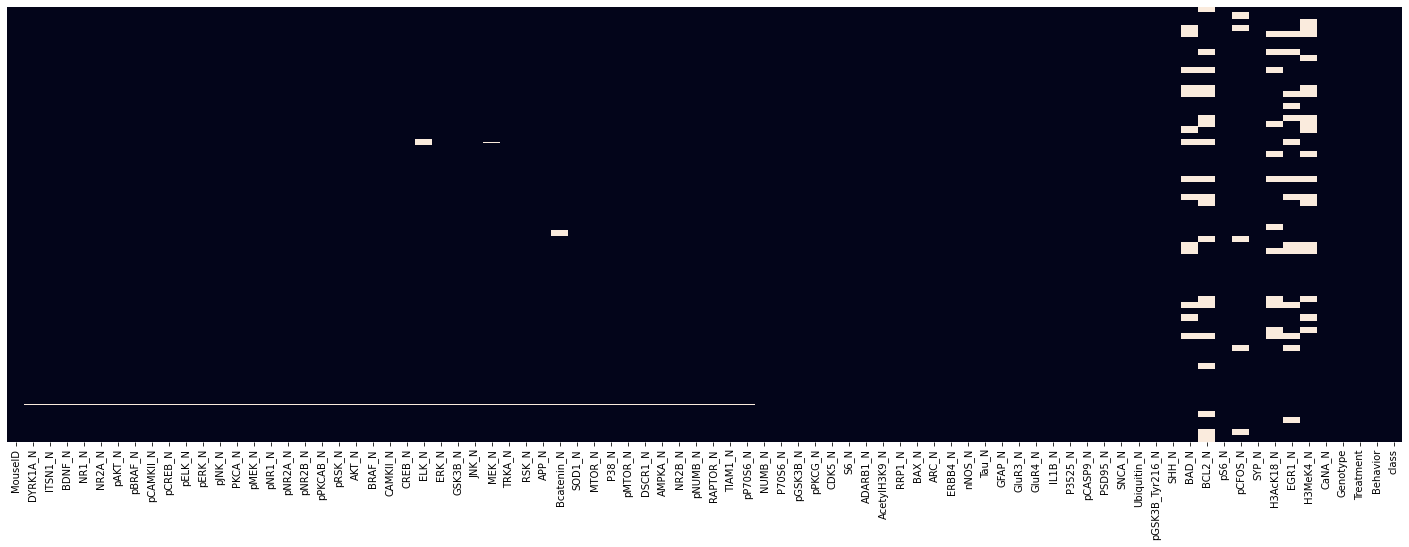

In [ ]:
plt.figure(figsize=(25,8))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

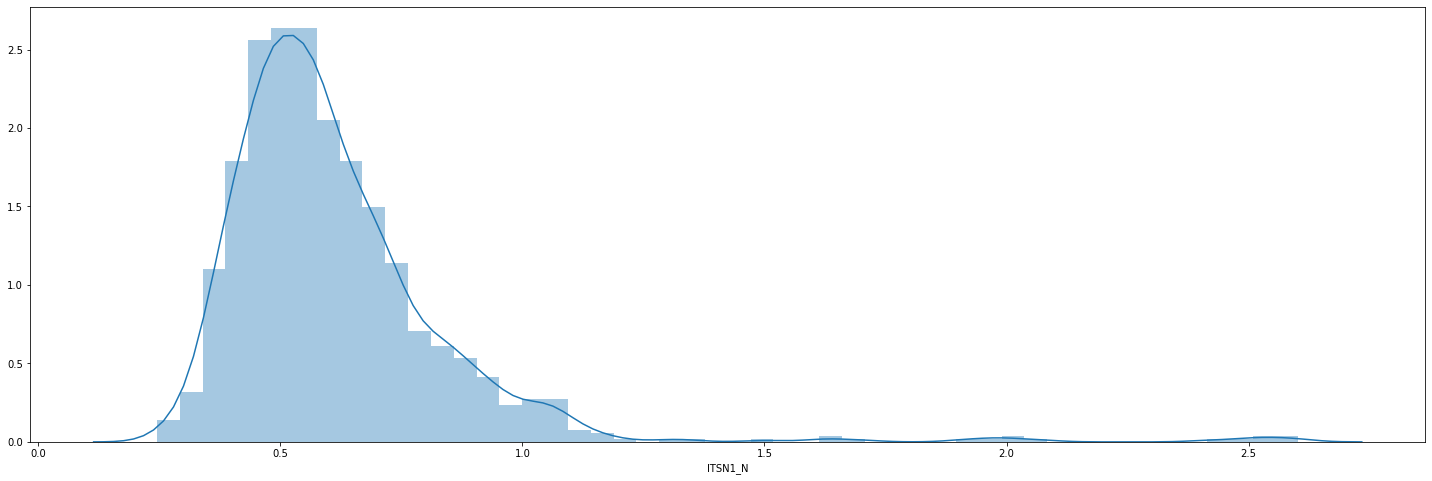

In [ ]:
plt.figure(figsize=(25,8))
sns.distplot(data['ITSN1_N'].dropna())

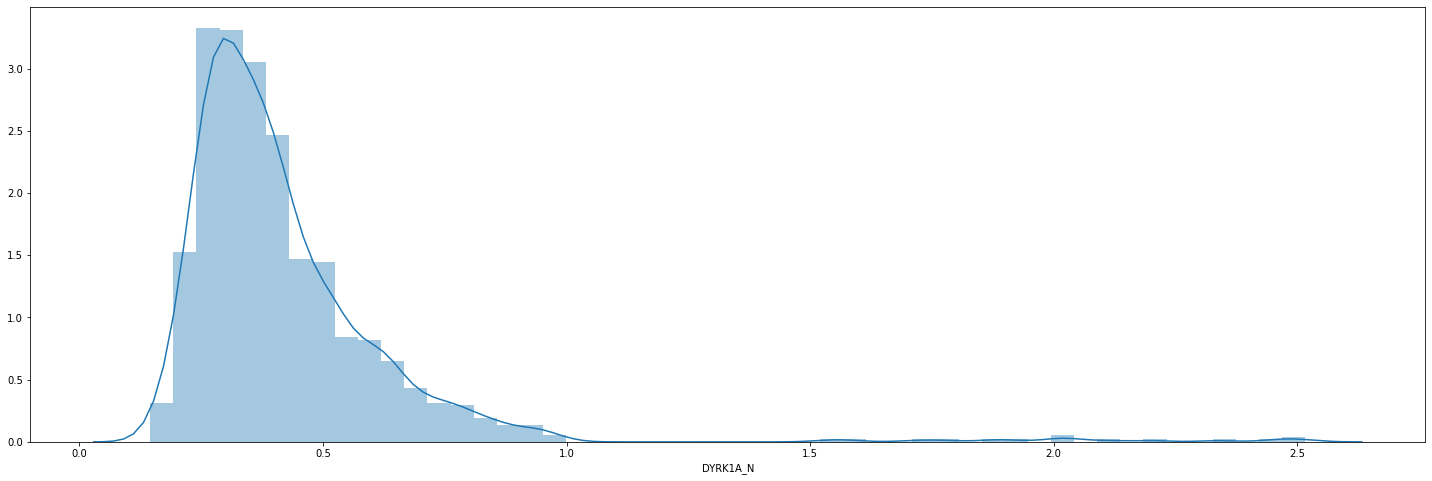

In [ ]:
plt.figure(figsize=(25,8))
sns.distplot(data['DYRK1A_N'].dropna())

it looks like normal distribution

In [ ]:
data.DYRK1A_N.describe()

In [ ]:
uppper_boundary=data['DYRK1A_N'].mean() + 3* data['DYRK1A_N'].std()
lower_boundary=data['DYRK1A_N'].mean() - 3* data['DYRK1A_N'].std()
print(lower_boundary), print(uppper_boundary),print(data['DYRK1A_N'].mean())

In [ ]:
data.DYRK1A_N.quantile(0.75) # it gives 75% of data

0.487711387

**we clearly see that lot of null values are present in the data**

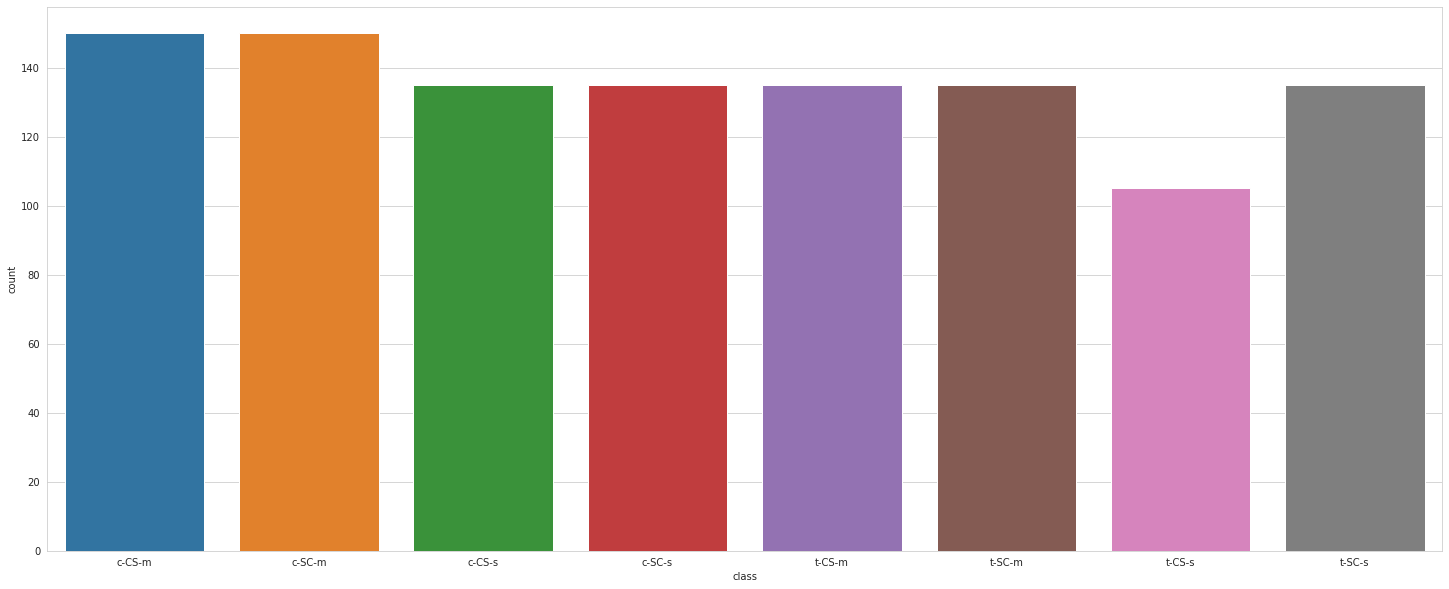

In [ ]:
plt.figure(figsize=(25,10))
sns.set_style('whitegrid')
sns.countplot(x='class',data=data)

**So data is balanced data**

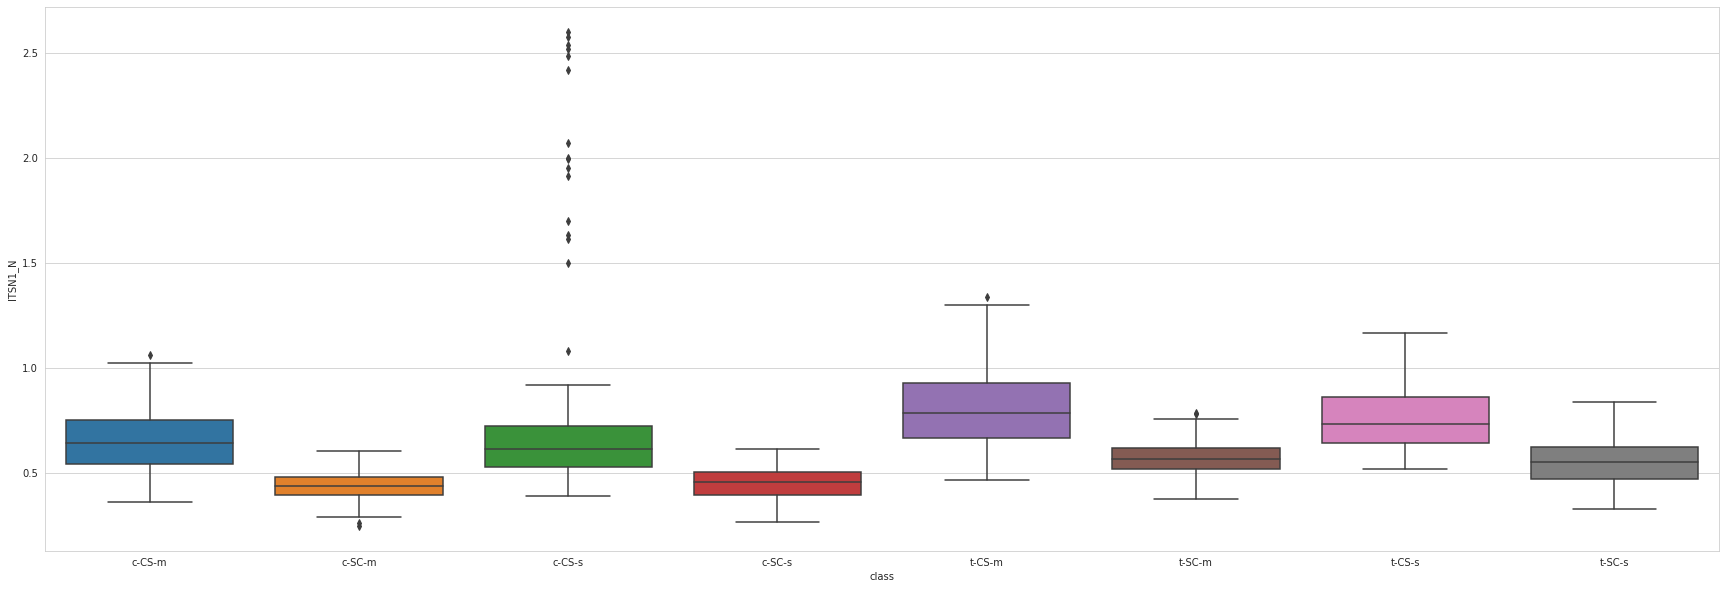

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(y=data['ITSN1_N'],x=data['class'])

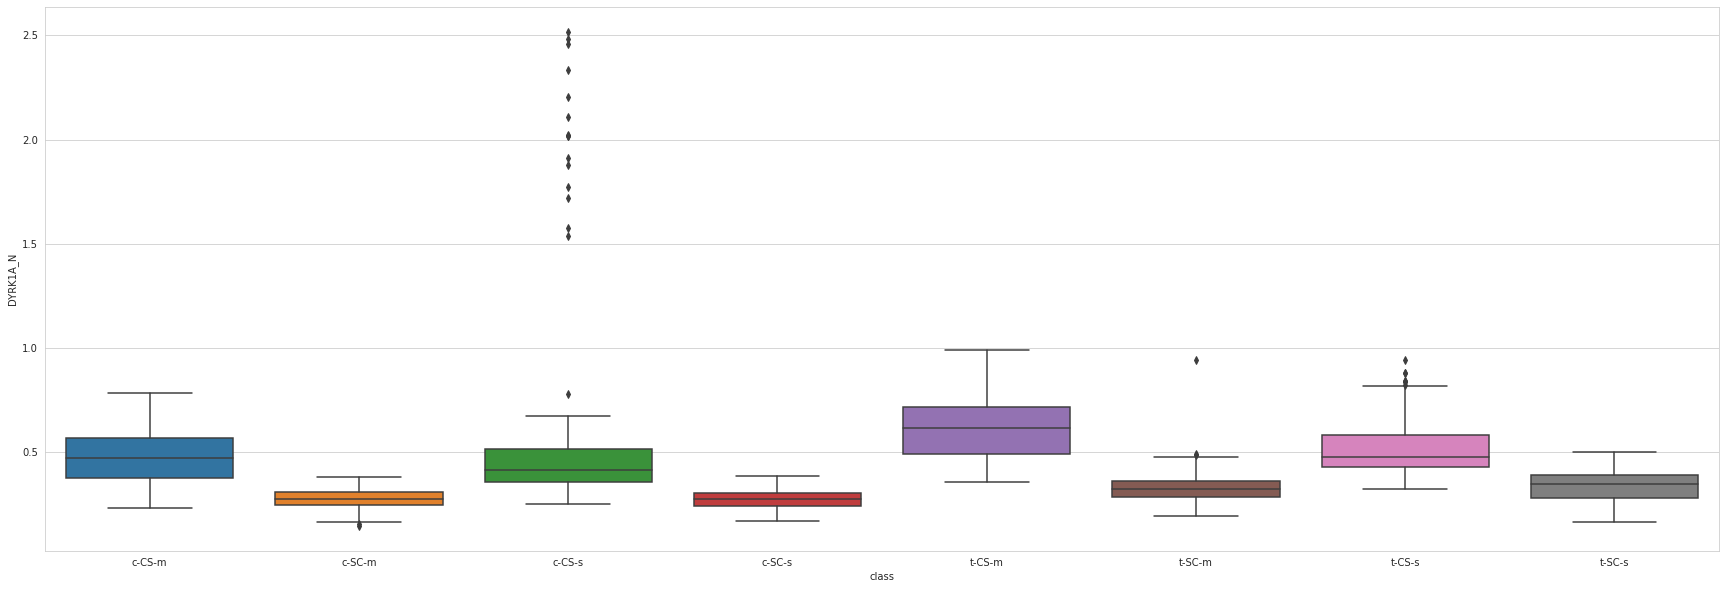

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(y=data['DYRK1A_N'],x=data['class'])

**outlires are present in the some columns**

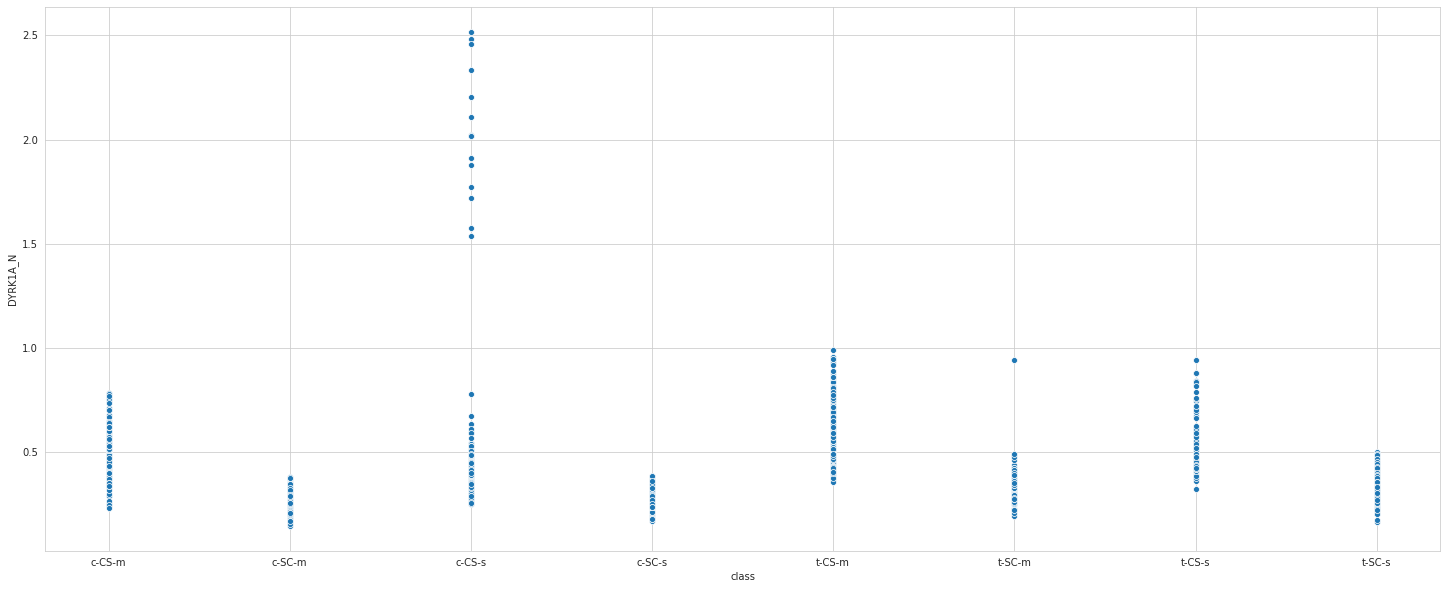

In [ ]:
plt.figure(figsize=(25,10))
sns.scatterplot(x="class", y="DYRK1A_N", data=data)

from Graph based EDA we get following observation

Given dataset contain lot of null values

From countplot we understand this is balanced classification labels

From boxplot we can easily identify outlires in the features


**Clean Data**

**1)   handle Null values**

In [ ]:
for i in range (0,len(null_list)-1):
  data[null_list[i]]=data[null_list[i]].fillna(data[null_list[i]].mean())

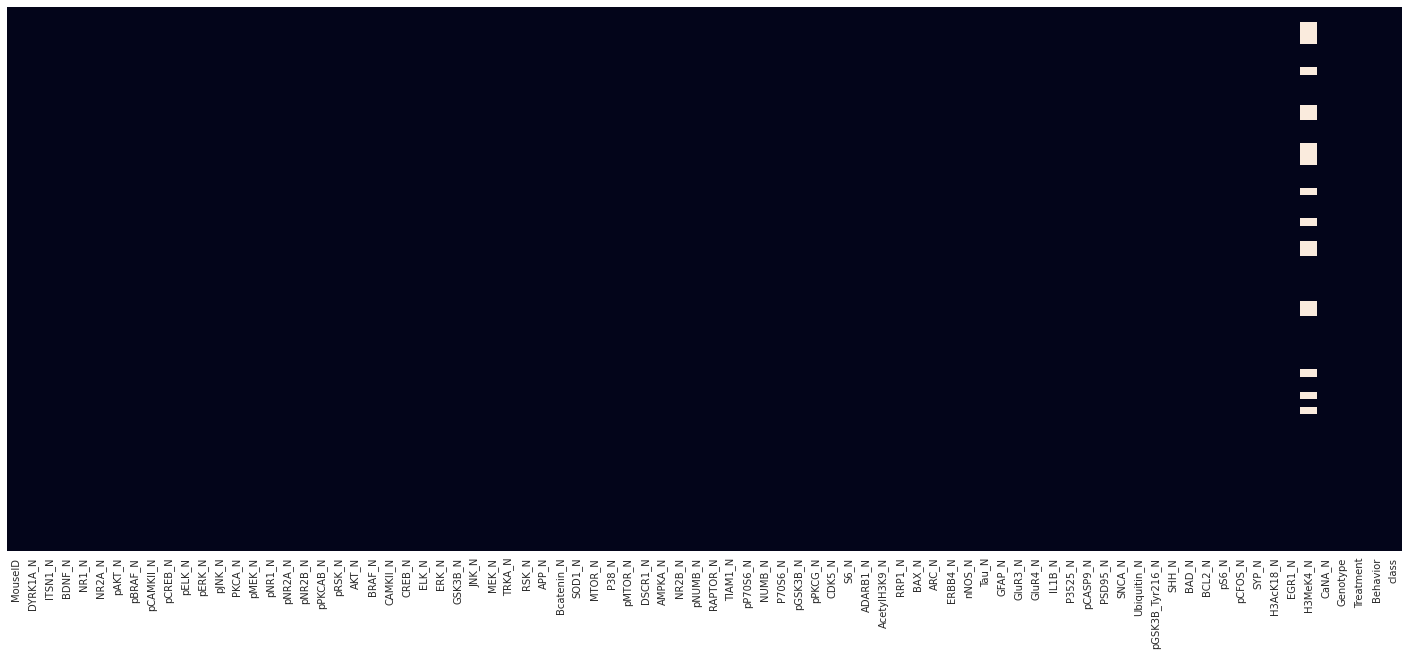

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [ ]:
data.isnull().any().sum() #inplace=True

1

In [ ]:
data['H3MeK4_N']=data['H3MeK4_N'].fillna(data['H3MeK4_N'].mean())

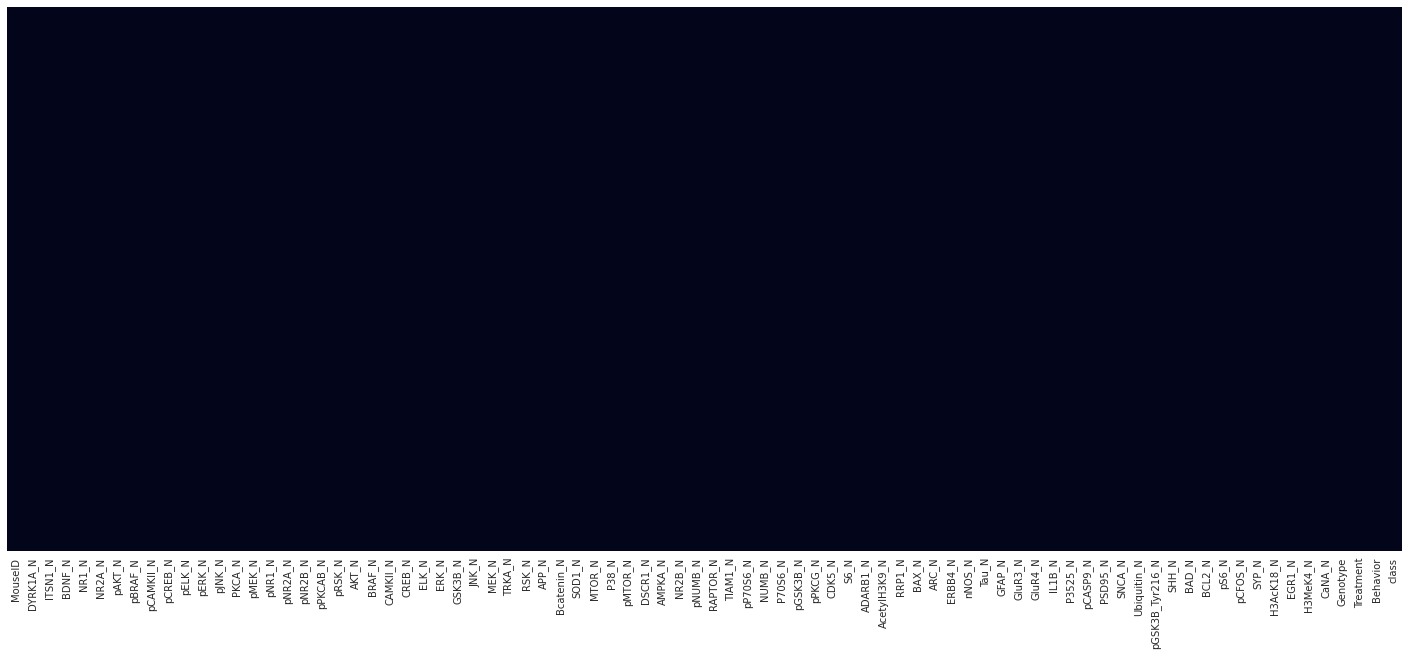

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

finally we get clean data free from missing  values

**2)   conversion of catogorical into integer using label-encoder**



In [ ]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 
data['MouseID']= label_encoder.fit_transform(data['MouseID']) 
data['Genotype']= label_encoder.fit_transform(data['Genotype']) 
data['Treatment']= label_encoder.fit_transform(data['Treatment']) 
data['Behavior']= label_encoder.fit_transform(data['Behavior'])   
data['class']= label_encoder.fit_transform(data['class']) 

In [ ]:
data['MouseID']

0         45
1         52
2         53
3         54
4         55
        ... 
1075    1067
1076    1068
1077    1069
1078    1070
1079    1071
Name: MouseID, Length: 1080, dtype: int64

In [ ]:
data.shape

(1080, 82)

when we perform one hot encoding dataframe size changes to **1080*89** but in this using label encoder case it reduce to 1080 * 82 **1080*82**

**3)  handling outlire**

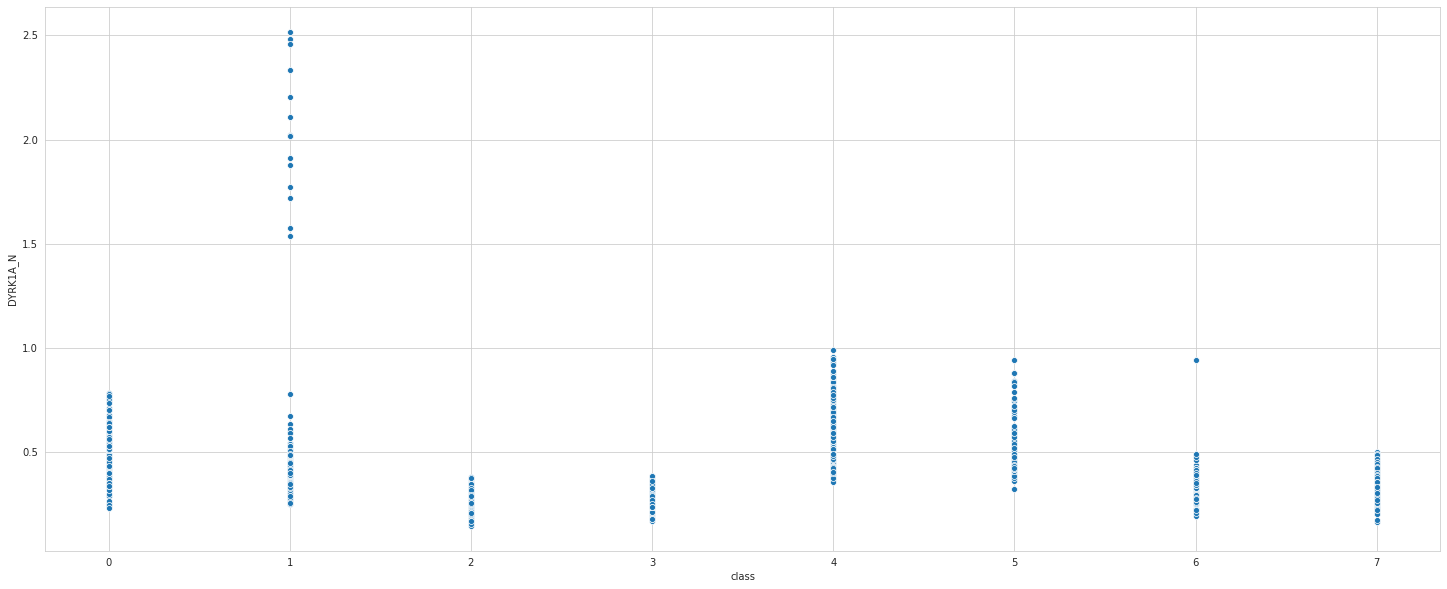

In [ ]:
plt.figure(figsize=(25,10))
sns.scatterplot(x="class", y="DYRK1A_N", data=data)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(data)
norm_data = norm.transform(data)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(data)
scale_data = scale.transform(data)

In [ ]:
#class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
new_data = pd.DataFrame(data=norm_data,columns=data.columns)
scale_data = pd.DataFrame(data=scale_data,columns=data.columns)


In [ ]:
new_data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.041705,0.151122,0.212885,0.824638,0.612119,0.630482,0.327006,0.448666,0.168257,0.617322,0.232553,0.157643,0.576167,0.747688,0.598504,0.574775,0.286697,0.650637,0.698164,0.622784,0.711198,0.136915,0.419649,0.317149,0.593715,0.627907,0.596269,0.640167,0.643070,0.766146,0.295596,0.549817,0.747441,0.092035,0.541196,0.152338,0.687269,0.553922,0.467278,0.509996,...,0.506018,0.163368,0.323059,0.373254,0.604516,0.303363,0.178458,0.324085,0.402810,0.083584,0.327870,0.690257,0.426816,0.412721,0.477834,0.057168,0.228825,0.531163,0.151103,0.242608,0.169702,0.432843,0.483783,0.044770,0.256699,0.405228,0.162941,0.177312,0.299172,0.426816,0.133930,0.336299,0.087715,0.102890,0.084580,0.705738,0.0,0.0,0.0,0.0
1,0.048193,0.155750,0.188226,0.776455,0.601070,0.585247,0.311887,0.429899,0.154925,0.590173,0.205362,0.159721,0.559556,0.688545,0.559598,0.502766,0.270688,0.587926,0.591606,0.629311,0.689095,0.128911,0.383669,0.291583,0.548032,0.578736,0.584234,0.614355,0.586180,0.724593,0.251840,0.491969,0.701976,0.075589,0.467650,0.137451,0.621033,0.512117,0.409897,0.457694,...,0.447496,0.145594,0.322736,0.376914,0.618918,0.302059,0.177452,0.324004,0.386524,0.084514,0.326426,0.664894,0.429952,0.463251,0.488028,0.075103,0.251911,0.576828,0.149555,0.285860,0.212421,0.472327,0.477640,0.054452,0.226088,0.433471,0.220010,0.146494,0.299172,0.429952,0.110434,0.365208,0.080692,0.115874,0.093977,0.749771,0.0,0.0,0.0,0.0
2,0.049120,0.153459,0.205696,0.793572,0.558911,0.575910,0.306369,0.441381,0.153485,0.607102,0.199194,0.154554,0.541938,0.670905,0.560573,0.554483,0.283848,0.590443,0.581558,0.669753,0.670907,0.128651,0.415579,0.292676,0.549983,0.599925,0.580790,0.625756,0.613502,0.730384,0.270560,0.472444,0.710718,0.076445,0.470688,0.137475,0.616142,0.510175,0.375653,0.467725,...,0.432379,0.125773,0.334325,0.383316,0.657565,0.332565,0.189744,0.369553,0.373234,0.094486,0.312439,0.700212,0.448652,0.415863,0.475009,0.071718,0.248192,0.607535,0.150434,0.373879,0.202733,0.467603,0.484953,0.044526,0.214719,0.429387,0.186816,0.155920,0.299172,0.448652,0.121560,0.353621,0.080465,0.109050,0.082162,0.868229,0.0,0.0,0.0,0.0
3,0.050046,0.125169,0.157688,0.637326,0.468152,0.480646,0.335530,0.444307,0.132074,0.486945,0.205135,0.127028,0.554293,0.657048,0.640641,0.413245,0.211238,0.522319,0.627585,0.687775,0.593408,0.121509,0.401866,0.319599,0.342080,0.452058,0.545716,0.625528,0.492220,0.667283,0.277208,0.440780,0.536330,0.076936,0.479533,0.144945,0.605654,0.514305,0.338199,0.461189,...,0.422989,0.267936,0.220414,0.311501,0.549444,0.364189,0.181101,0.231762,0.333033,0.076248,0.338264,0.669358,0.392700,0.372772,0.397939,0.053257,0.245676,0.562594,0.156083,0.242672,0.184790,0.364359,0.449304,0.119259,0.208943,0.407971,0.179047,0.229602,0.299172,0.392700,0.151031,0.265619,0.126763,0.164241,0.144543,0.721879,0.0,0.0,0.0,0.0
4,0.050973,0.122146,0.157838,0.637787,0.426467,0.441977,0.314976,0.433100,0.129086,0.410194,0.189152,0.117572,0.532161,0.608970,0.551236,0.401706,0.200364,0.486489,0.579839,0.698127,0.557701,0.112407,0.381348,0.297196,0.358746,0.433909,0.519977,0.599623,0.471524,0.627685,0.239874,0.410395,0.519186,0.067645,0.436522,0.121261,0.548237,0.501294,0.283304,0.416698,...,0.374357,0.262839,0.212521,0.317400,0.559551,0.376199,0.181805,0.258720,0.337126,0.079697,0.330219,0.686524,0.410187,0.385008,0.422195,0.080162,0.234762,0.656300,0.147044,0.325597,0.187625,0.3

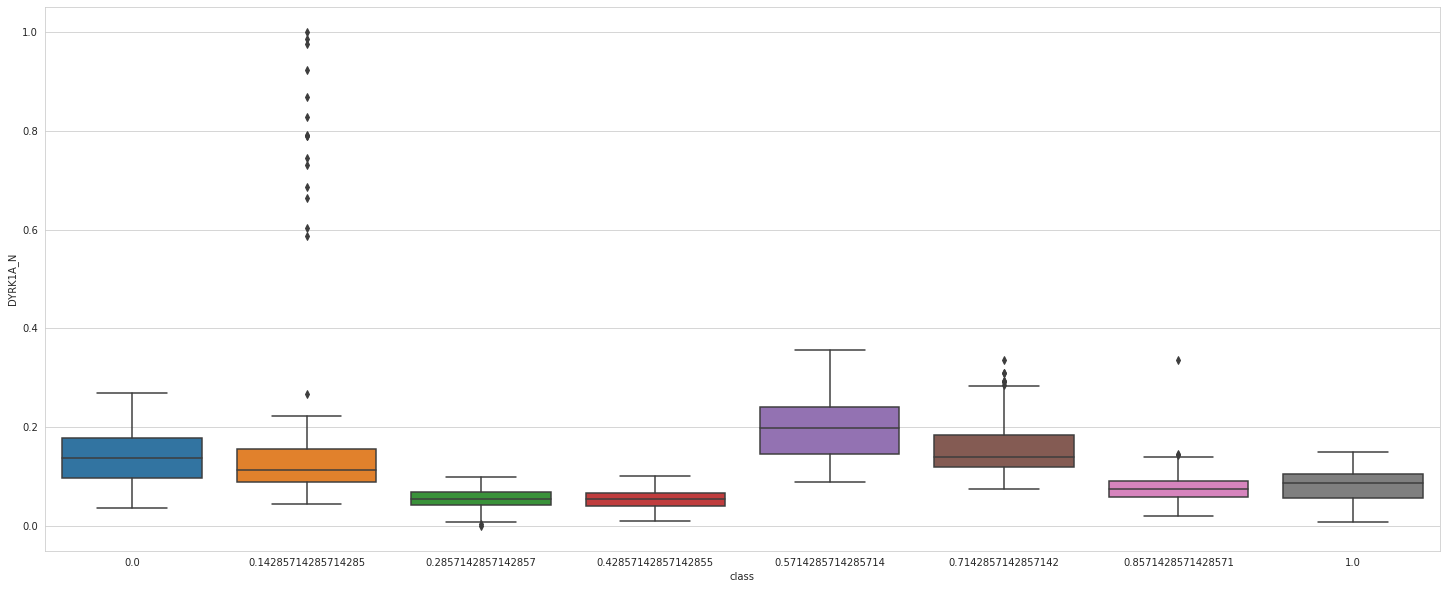

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(y=new_data['DYRK1A_N'],x=new_data['class'])


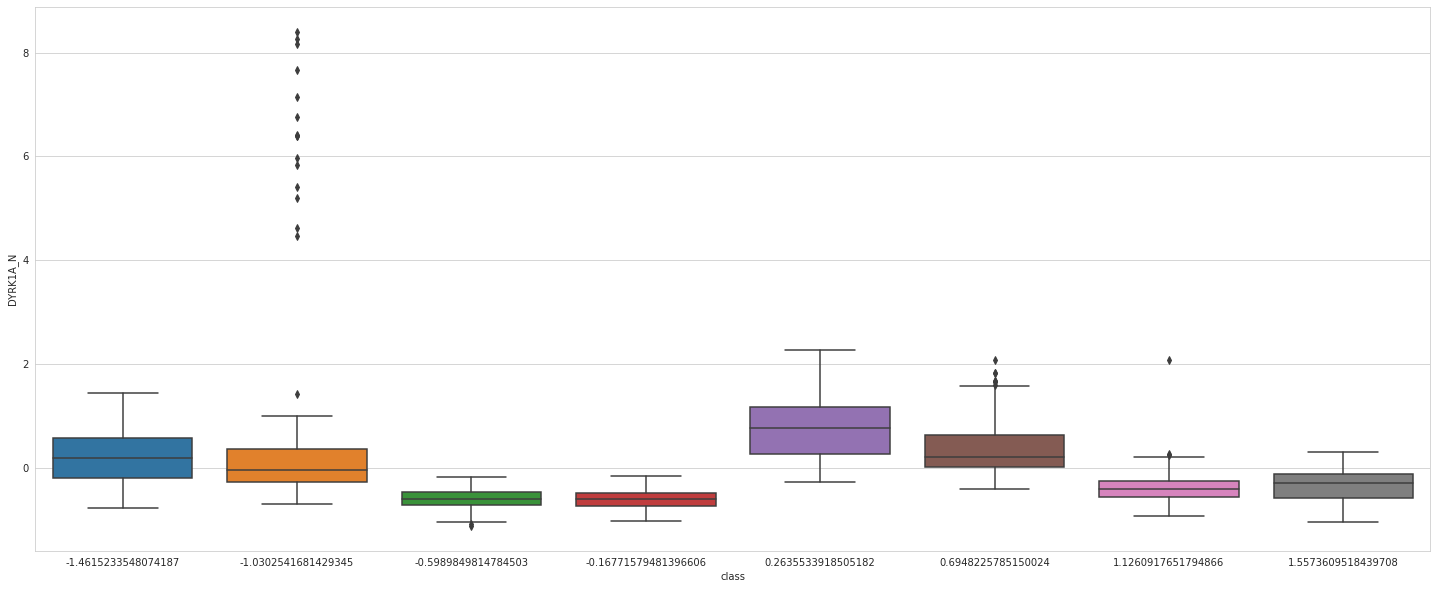

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(y=scale_data['DYRK1A_N'],x=scale_data['class'])

tried to normalize the data but it didint work 

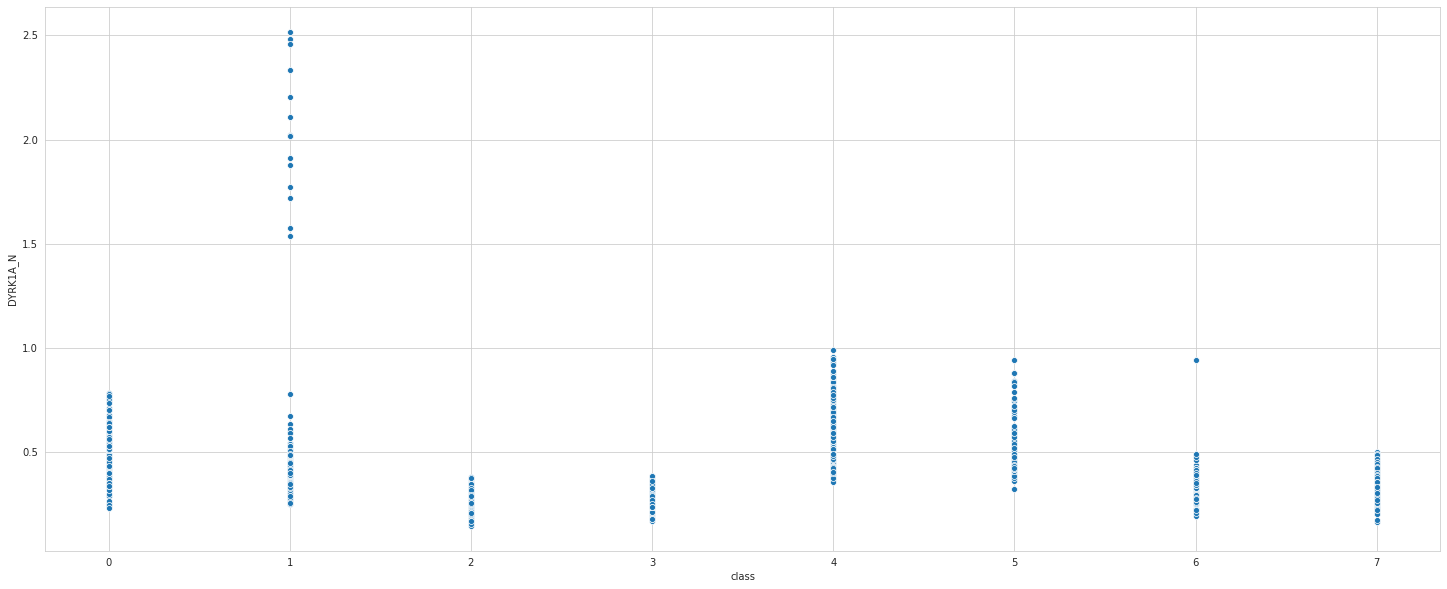

In [ ]:
plt.figure(figsize=(25,10))
sns.scatterplot(x="class", y="DYRK1A_N", data=data)

In [ ]:
uppper_boundary=data['DYRK1A_N'].mean() + 3* data['DYRK1A_N'].std()
lower_boundary=data['DYRK1A_N'].mean() - 3* data['DYRK1A_N'].std()
print(lower_boundary), print(uppper_boundary),print(data['DYRK1A_N'].mean())

-0.32123503263406994
1.1728553584539414
0.4258101629099357


(None, None, None)

In [ ]:
data.DYRK1A_N.describe()

count    1080.000000
mean        0.425810
std         0.249015
min         0.145327
25%         0.288163
50%         0.366540
75%         0.487574
max         2.516367
Name: DYRK1A_N, dtype: float64

In [ ]:
data.DYRK1A_N.quantile(0.75) # it gives 75% of data

0.487573789

In [ ]:
data[data.columns[1]].quantile(0.75)

0.487573789

we use quantile function to handle outlires

In [ ]:
#for i in range(1,len(data.columns)-5):
  #data[data.columns[1]].quantile(0.75)
  #qvalue=data[data.columns[i]].quantile(0.75)
  #data.loc[data['DYRK1A_N']>=0.78,'DYRK1A_N']=0.78
  #data.loc[data[data.columns[i]]>=qvalue,data.columns[i]]=qvalue


In [ ]:
IQR=data.DYRK1A_N.quantile(0.75)-data.DYRK1A_N.quantile(0.25)
lower_bridge=data['DYRK1A_N'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['DYRK1A_N'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-0.010953971624999947
0.7866904453749999


(None, None)

In [ ]:
data.loc[data['DYRK1A_N']>=0.78,'DYRK1A_N']=0.78

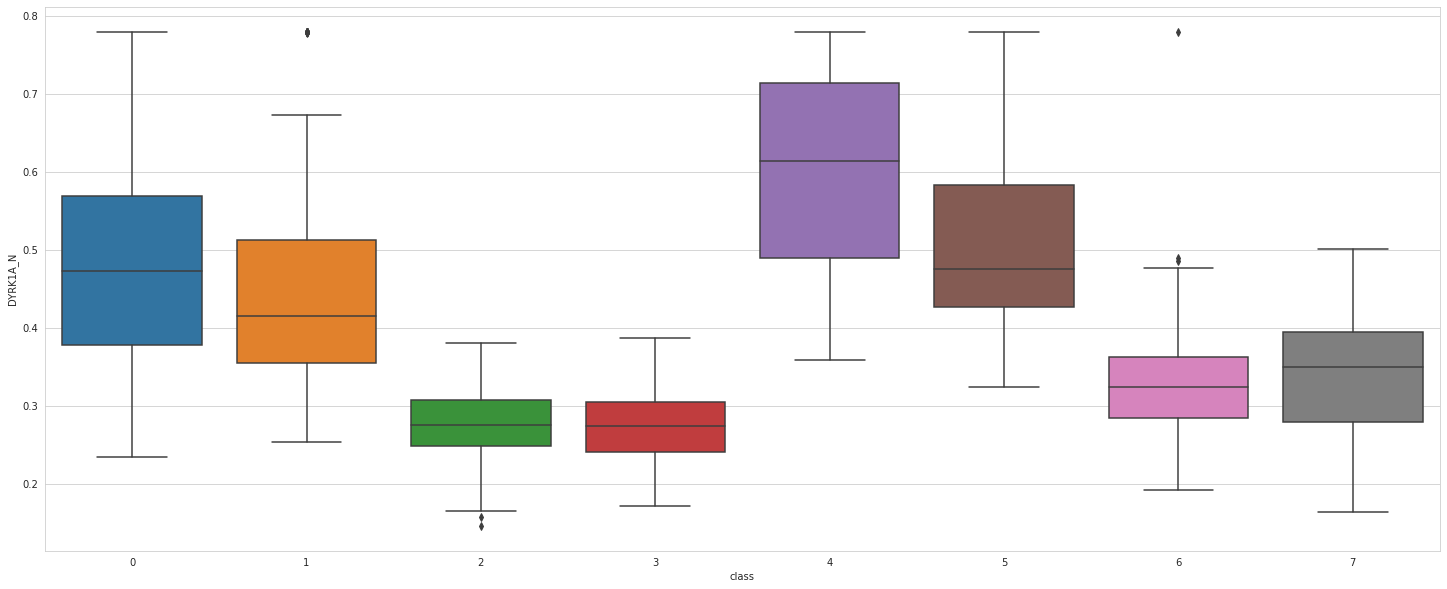

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(y=data['DYRK1A_N'],x=data['class'])

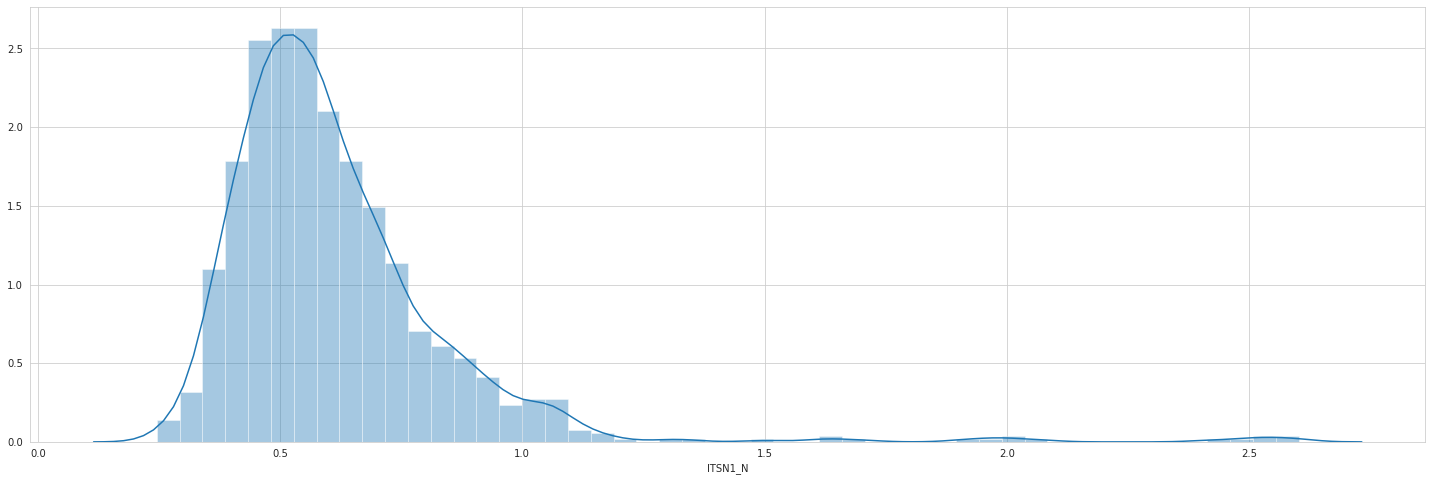

In [ ]:
plt.figure(figsize=(25,8))
sns.distplot(data['ITSN1_N'].dropna())

**Graph based EDA after data cleaning**

before

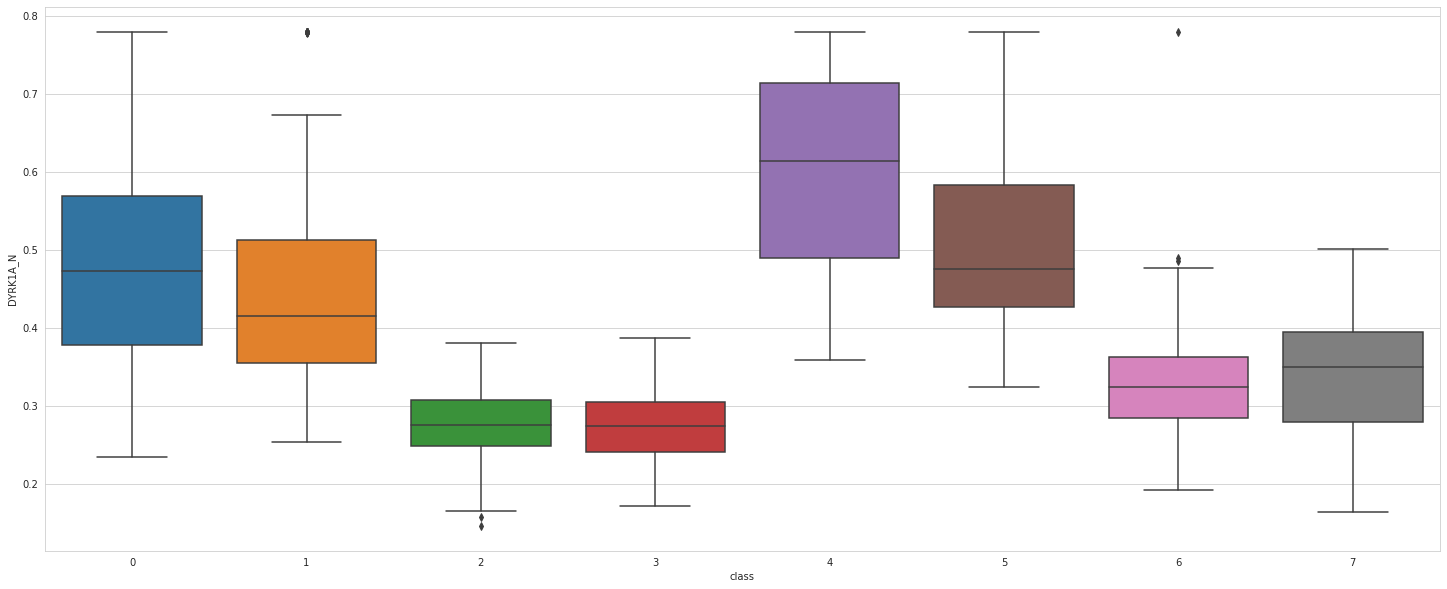

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(y=data['DYRK1A_N'],x=data['class'])

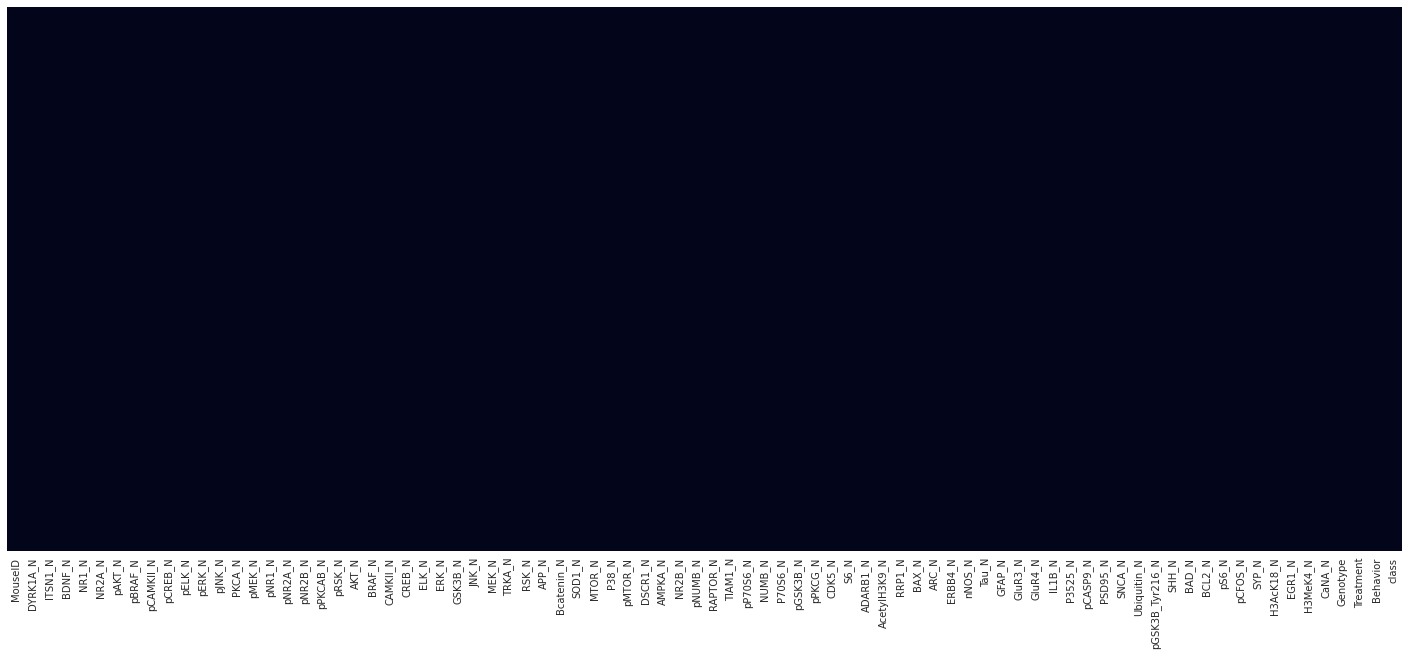

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [ ]:
corr = data.corr().abs()

In [ ]:
type(corr)

pandas.core.frame.DataFrame

In [ ]:
corr.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,1.000000,0.042933,0.057796,0.076119,0.103526,0.002220,0.043019,0.032235,0.211091,0.130023,0.032141,0.034574,0.010917,0.101803,0.044558,0.040421,0.131923,0.000730,0.217801,0.162849,0.014604,0.002720,0.036735,0.041517,0.044692,0.003137,0.124909,0.081459,0.111944,0.141907,0.064340,0.192721,0.075346,0.129264,0.046311,0.069504,0.030558,0.090066,0.075460,0.066337,...,0.037699,0.199271,0.156677,0.043918,0.037212,0.275704,0.074526,0.228297,0.001885,0.030993,0.117879,0.013517,0.099753,0.031059,0.036440,0.054733,0.146898,0.041406,0.023083,0.138149,0.007892,0.090617,0.059393,0.088317,0.041918,0.203634,0.011116,0.021846,0.193754,0.099753,0.099399,0.038283,0.046359,0.121108,0.077626,0.073344,0.161962,0.210149,0.043452,0.203460
DYRK1A_N,0.042933,1.000000,0.816066,0.386025,0.299812,0.335363,0.207733,0.134593,0.206651,0.052403,0.602434,0.807822,0.133428,0.342628,0.126601,0.190016,0.235281,0.194677,0.475624,0.092292,0.033999,0.747308,0.023880,0.038348,0.342151,0.455430,0.719631,0.187035,0.173518,0.351244,0.055578,0.484791,0.260693,0.519749,0.162945,0.443592,0.172312,0.021460,0.149700,0.099079,...,0.150019,0.221497,0.323997,0.187584,0.388100,0.064355,0.242729,0.386738,0.195375,0.213784,0.091510,0.117235,0.381804,0.240580,0.056152,0.036465,0.039396,0.028329,0.018074,0.469161,0.120976,0.174027,0.180922,0.529370,0.484565,0.266313,0.234079,0.331597,0.245384,0.381804,0.317006,0.101266,0.357166,0.440091,0.415017,0.559687,0.233260,0.092310,0.684757,0.114190
ITSN1_N,0.057796,0.816066,1.000000,0.459884,0.422492,0.426182,0.147775,0.076507,0.132870,0.171122,0.780926,0.906289,0.037600,0.338729,0.020159,0.317561,0.101523,0.312979,0.445472,0.124875,0.200803,0.917608,0.075535,0.012347,0.468073,0.530207,0.838842,0.253215,0.329893,0.454249,0.003534,0.441473,0.416758,0.323622,0.120840,0.384926,0.100517,0.035599,0.195132,0.026333,...,0.170697,0.209752,0.377558,0.262487,0.371109,0.026025,0.294235,0.313192,0.205300,0.149965,0.061968,0.265361,0.256549,0.125923,0.013169,0.084972,0.039775,0.024467,0.029563,0.386448,0.068696,0.111019,0.078895,0.433210,0.371859,0.380741,0.200566,0.317332,0.239950,0.256549,0.303596,0.042411,0.229798,0.387269,0.323434,0.517669,0.173306,0.031710,0.483342,0.052291
BDNF_N,0.076119,0.386025,0.459884,1.000000,0.805784,0.749993,0.317537,0.390530,0.246760,0.603857,0.451598,0.351388,0.464904,0.770690,0.474147,0.754279,0.359175,0.698359,0.568484,0.341372,0.608680,0.331664,0.570094,0.425910,0.729902,0.736353,0.670463,0.632191,0.766504,0.800254,0.390159,0.640633,0.732426,0.001086,0.501561,0.108920,0.451593,0.405527,0.716018,0.572420,...,0.617848,0.086524,0.398189,0.209809,0.359662,0.071402,0.384675,0.107550,0.593003,0.101173,0.015490,0.407163,0.127691,0.202772,0.182665,0.015932,0.062649,0.031786,0.142333,0.264922,0.205887,0.056645,0.043633,0.182755,0.051536,0.182786,0.080669,0.171927,0.136981,0.127691,0.248663,0.450313,0.126825,0.227111,0.212573,0.262521,0.043823,0.067485,0.145298,0.085850
NR1_N,0.103526,0.299812,0.422492,0.805784,1.000000,0.873889,0.211540,0.244224,0.301151,0.597443,0.416629,0.273353,0.444001,0.614342,0.377457,0.947872,0.510043,0.895077,0.443719,0.239082,0.703446,0.234594,0.467345,0.193995,0.816870,0.807778,0.670692,0.532911,0.694466,0.856851,0.255331,0.520926,0.913420,0.162459,0.405647,0.042114,0.487358,0.244220,0.629025,0.522296,...,0.466602,0.031230,0.537307,0.420546,0.183837,0.023742,0.355870,0.098254,0.573762,0.1

In [ ]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

In [ ]:
upper

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,NaN,0.042933,0.057796,0.076119,0.103526,0.002220,0.043019,0.032235,0.211091,0.130023,0.032141,0.034574,0.010917,0.101803,0.044558,0.040421,0.131923,0.000730,0.217801,0.162849,0.014604,0.002720,0.036735,0.041517,0.044692,0.003137,0.124909,0.081459,0.111944,0.141907,0.064340,0.192721,0.075346,0.129264,0.046311,0.069504,0.030558,0.090066,0.075460,0.066337,...,0.037699,0.199271,0.156677,0.043918,0.037212,0.275704,0.074526,0.228297,0.001885,0.030993,0.117879,0.013517,0.099753,0.031059,0.036440,0.054733,0.146898,0.041406,0.023083,0.138149,0.007892,0.090617,0.059393,0.088317,0.041918,0.203634,0.011116,0.021846,0.193754,0.099753,0.099399,0.038283,0.046359,0.121108,0.077626,0.073344,0.161962,0.210149,0.043452,0.203460
DYRK1A_N,NaN,NaN,0.816066,0.386025,0.299812,0.335363,0.207733,0.134593,0.206651,0.052403,0.602434,0.807822,0.133428,0.342628,0.126601,0.190016,0.235281,0.194677,0.475624,0.092292,0.033999,0.747308,0.023880,0.038348,0.342151,0.455430,0.719631,0.187035,0.173518,0.351244,0.055578,0.484791,0.260693,0.519749,0.162945,0.443592,0.172312,0.021460,0.149700,0.099079,...,0.150019,0.221497,0.323997,0.187584,0.388100,0.064355,0.242729,0.386738,0.195375,0.213784,0.091510,0.117235,0.381804,0.240580,0.056152,0.036465,0.039396,0.028329,0.018074,0.469161,0.120976,0.174027,0.180922,0.529370,0.484565,0.266313,0.234079,0.331597,0.245384,0.381804,0.317006,0.101266,0.357166,0.440091,0.415017,0.559687,0.233260,0.092310,0.684757,0.114190
ITSN1_N,NaN,NaN,NaN,0.459884,0.422492,0.426182,0.147775,0.076507,0.132870,0.171122,0.780926,0.906289,0.037600,0.338729,0.020159,0.317561,0.101523,0.312979,0.445472,0.124875,0.200803,0.917608,0.075535,0.012347,0.468073,0.530207,0.838842,0.253215,0.329893,0.454249,0.003534,0.441473,0.416758,0.323622,0.120840,0.384926,0.100517,0.035599,0.195132,0.026333,...,0.170697,0.209752,0.377558,0.262487,0.371109,0.026025,0.294235,0.313192,0.205300,0.149965,0.061968,0.265361,0.256549,0.125923,0.013169,0.084972,0.039775,0.024467,0.029563,0.386448,0.068696,0.111019,0.078895,0.433210,0.371859,0.380741,0.200566,0.317332,0.239950,0.256549,0.303596,0.042411,0.229798,0.387269,0.323434,0.517669,0.173306,0.031710,0.483342,0.052291
BDNF_N,NaN,NaN,NaN,NaN,0.805784,0.749993,0.317537,0.390530,0.246760,0.603857,0.451598,0.351388,0.464904,0.770690,0.474147,0.754279,0.359175,0.698359,0.568484,0.341372,0.608680,0.331664,0.570094,0.425910,0.729902,0.736353,0.670463,0.632191,0.766504,0.800254,0.390159,0.640633,0.732426,0.001086,0.501561,0.108920,0.451593,0.405527,0.716018,0.572420,...,0.617848,0.086524,0.398189,0.209809,0.359662,0.071402,0.384675,0.107550,0.593003,0.101173,0.015490,0.407163,0.127691,0.202772,0.182665,0.015932,0.062649,0.031786,0.142333,0.264922,0.205887,0.056645,0.043633,0.182755,0.051536,0.182786,0.080669,0.171927,0.136981,0.127691,0.248663,0.450313,0.126825,0.227111,0.212573,0.262521,0.043823,0.067485,0.145298,0.085850
NR1_N,NaN,NaN,NaN,NaN,NaN,0.873889,0.211540,0.244224,0.301151,0.597443,0.416629,0.273353,0.444001,0.614342,0.377457,0.947872,0.510043,0.895077,0.443719,0.239082,0.703446,0.234594,0.467345,0.193995,0.816870,0.807778,0.670692,0.532911,0.694466,0.856851,0.255331,0.520926,0.913420,0.162459,0.405647,0.042114,0.487358,0.244220,0.629025,0.522296,...,0.466602,0.031230,0.537307,0.420546,0.183837,0.023742,0.355870,0.098254,0.573762,0.157031,0.135636,0.482756,0.264157,0.266287,0.398550,0.057029,0.140411,0.1534

In [ ]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [ ]:
to_drop # column having higher correlation

['pS6_N']

**Model building**

In [ ]:
x=data.iloc[:,0:79]
#y=data2.iloc[:,80]
y=data.pop('class')



In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x)
new_x = norm.transform(x)

In [ ]:
y.shape

(1080,)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.25)

**why we selecting DecisionTree ?**

our problem statement is Multiclass Classification problem 
we used DecisionTree,KNeighborsClassifier,RandomForestClassifier these algorithum with Mice Protein dataset we come to know that

without handling outlire and after cross-validation

RandomForestClassifier  71---------------->56

KNeighborsClassifier    94---------------->68

DecisionTree            92---------------->70

all these accuracy from ineuronv3_1 version file

**after handling outlire and after cross-validation**

RandomForestClassifier   77---------------75

KNeighborsClassifier     98--------------82

DecisionTree             99--------------99

all these accuracy from ineuronv5_1 version file


In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
model = dt.fit(X_train, y_train)
prad = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prad)

0.9814814814814815

**98.11**

**store model into pickle file**

In [ ]:
X_test.to_csv('file.csv')

In [ ]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()